#### 





# This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is classified as definitely edible, definitely poisonous .We need build a model to correctly predcit the ediblity  of the sample by evaluating  other factors inthe data 

## Importing the required liabraries and Loading DataSet

In [207]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.tree import export_graphviz
#import graphviz
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset 

In [208]:
#Loading the dataset 
df =pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### The Class column is the label and rest are featutres 

In [209]:
df.shape # it has total 8124  records and 23 columns 


(8124, 23)

### it has total 8124  records and 23 columns 

In [210]:
df.info() 
# All are not null comumns of  object type
# Will need encoding to apprroach for Heatmaps etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### All are not null comumns of  object type
### Will need encoding to apprroach for Heatmaps etc

In [211]:
#Checking data quaity for Null records :though all columns are not null
df.isnull().sum()
# No missing values 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### No missing values found
### Checking for class Imbalance in counts and Visualize ofr better understanding 

In [212]:
#Checking for class Imbalance in counts
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

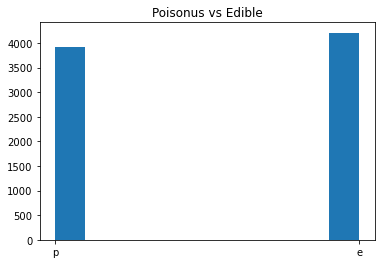

In [213]:
df['class'].hist(grid = False)
plt.title('Poisonus vs Edible')
plt.show()

### Data set is looking balanced and so sampling will be required

## Data Manipulation.

### As all the columns are categorical  and OBJ type we need to entire table ENCODING

In [214]:
#LabelEncoder

lab_enc =LabelEncoder()
#Each and Every data in the features are categorical . 
# Categorical data will not have any outliers 
# so All the Care
for i in df.columns:
    df[i]  = lab_enc.fit_transform(df[i])
    #pd.Series(i)
    #df[i] = i
 # Data cinvertion completed   


### Data description post ENCODING

In [299]:
#Data describe 
df.head()
# from the describe we can see Veil type is equal ,0 thus will not impact the classification results 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [300]:
#Data describe 
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


### WE can observe that veiltype is having uniform values , hence will be droped 



In [ ]:
#Drop Columns with uniform values
df=df.drop(["veil-type"],axis=1)

In [217]:
df.info()
# All are INT data ; Veil type delted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [218]:
pd.set_option('display.max_rows',None)

In [219]:
df.head()# data is same scale  no scaling required


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Visualization 

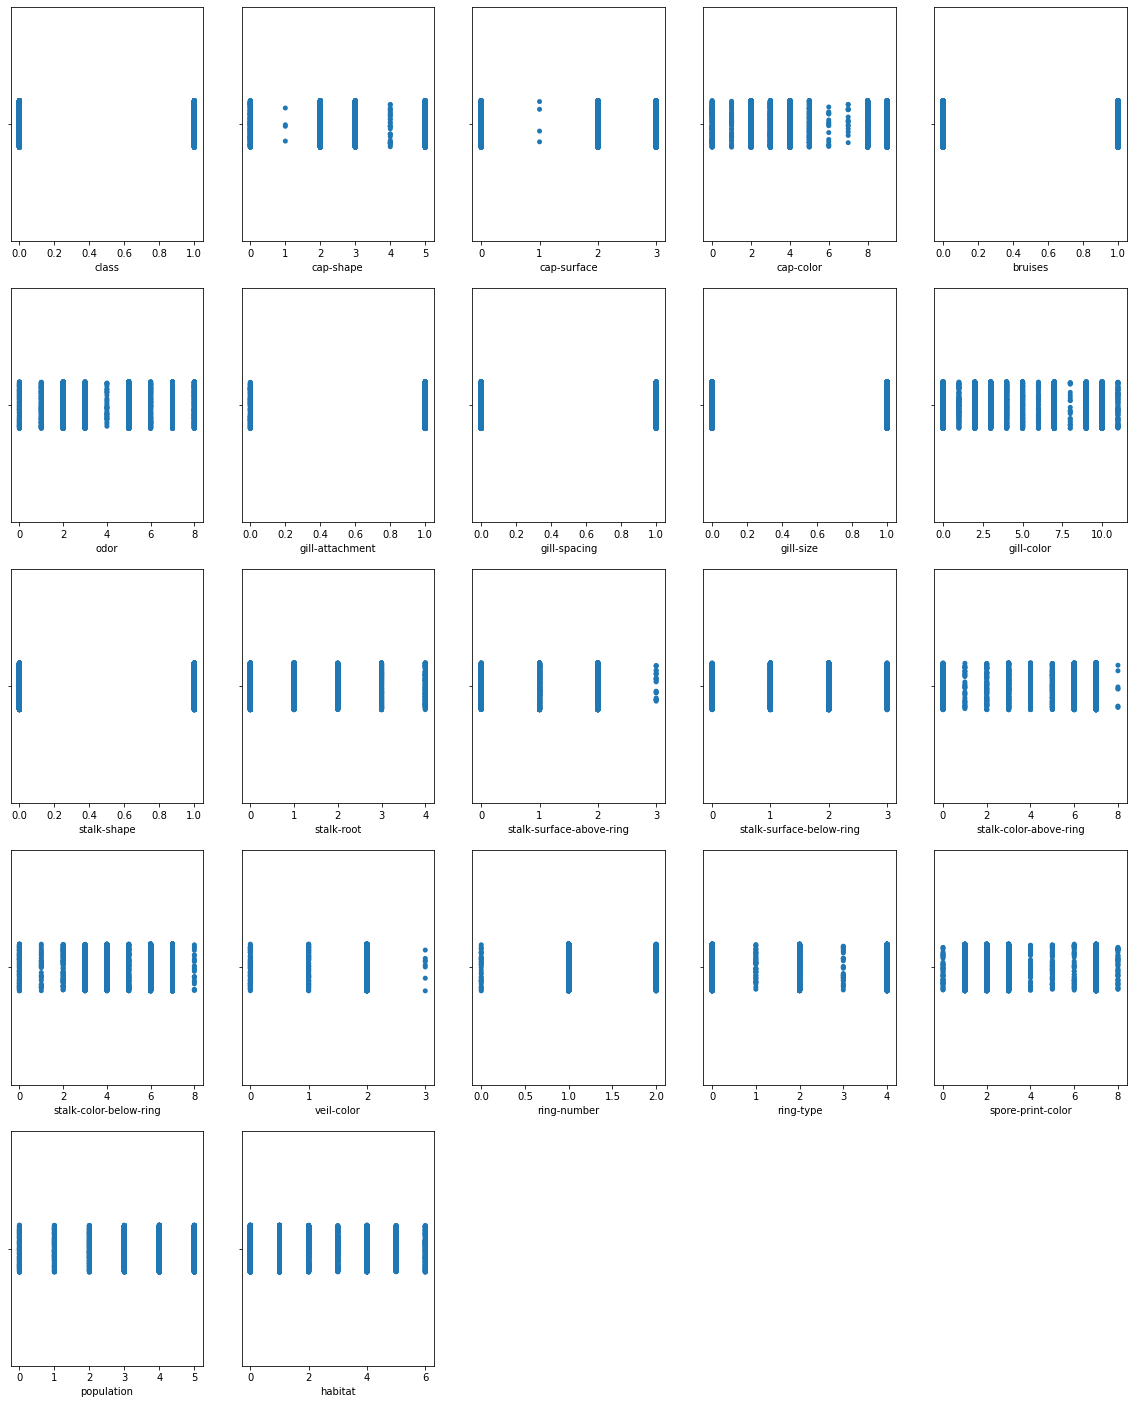

In [220]:
plt.figure(figsize =(20,25))
plt_no=1
for i in df:
    if plt_no<24:
        ax=plt.subplot(5,5,plt_no)
        sns.stripplot(df[i])
        plt.xlabel(i)
    plt_no +=1
plt.show()

### Checking Correaltion and HEAT MAP Design

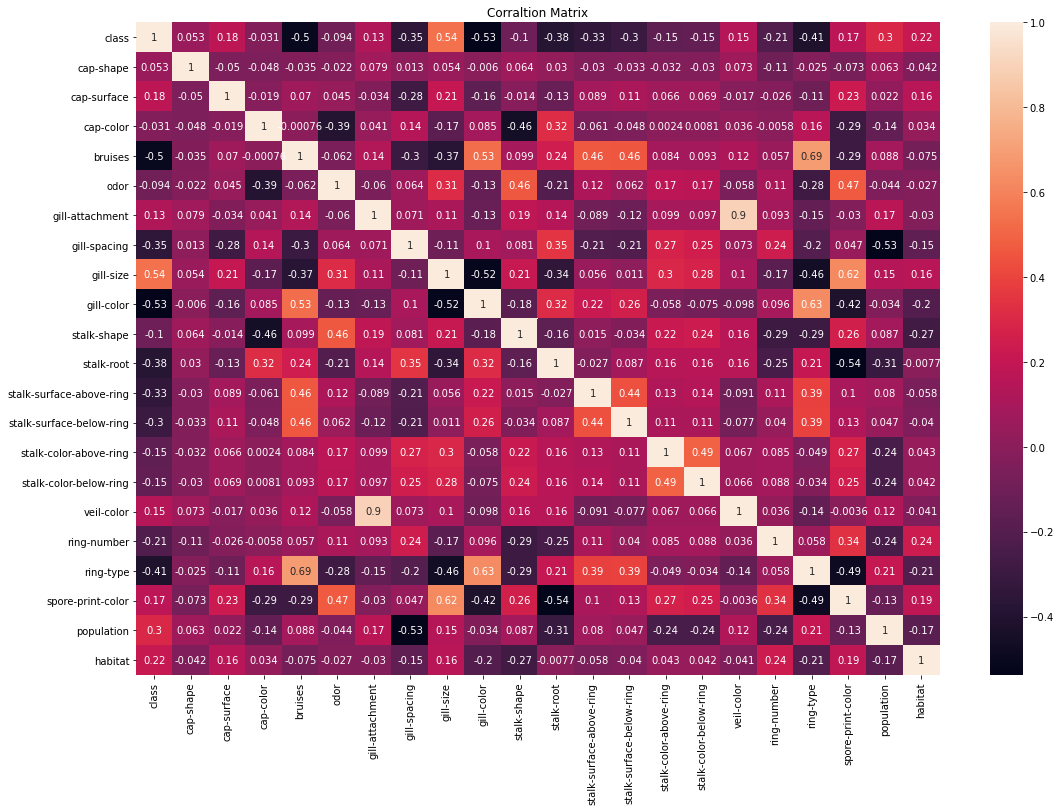

In [221]:
#Checking Correaltion
df_corr= df.corr()
#Plottinh Heat MAP
plt.figure(figsize=[18,12])
sns.heatmap(df_corr,annot=True)
plt.title('Corraltion Matrix')
plt.show()

In [222]:
df_corr['class'].sort_values(ascending =False)
# All have little bit correraltion as no co has 0.00... values 

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [223]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.
x = df.drop(['class'],axis =1)
y = df['class']

In [224]:
x.skew(0)

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

### Finding Best Random state

In [227]:
#Finding Best Random state
from sklearn.linear_model import LogisticRegression
maxaccu =0
rs =0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=i)   
    lr = LogisticRegression()
    lr.fit(xtrain,ytrain)
    predrf =lr.predict(xtest)
    acc= accuracy_score(ytest,predrf)
    if acc>maxaccu :
        maxaccu =acc
        rs=i
rs

21

#### Best Random State = 21

## Modelling

In [228]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21) 

### Logistic Regression

In [229]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred =LR.predict(xtest)
acc_LR= accuracy_score(ytest,ypred)
print('Accuracy_LR',acc_LR)
print('\n Classification Report_LR')
print(classification_report(ytest,ypred))

Accuracy_LR 0.9649230769230769

 Classification Report_LR
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       842
           1       0.96      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.96      0.96      0.96      1625



### K Nearest neighbour 

In [230]:
#2 K Nearest neighbour 
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
yknn =KNN.predict(xtest)
acc_KNN= accuracy_score(ytest,yknn)
print('Accuracy_KNN',acc_LR)
print('\n Classification Report_KNN')
print(classification_report(ytest,yknn))

Accuracy_KNN 0.9649230769230769

 Classification Report_KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Desicion Tree Classifier

In [231]:
#3 DT 
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(-)
DT.fit(xtrain, ytrain)
ydt =DT.predict(xtest)
acc_DT= accuracy_score(ytest,ydt)
print('Accuracy_DT',acc_DT)
print('\n Classification Report_KNN')
print(classification_report(ytest,ydt))

Accuracy_DT 1.0

 Classification Report_KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



###  Randon Forest Boosting

In [253]:
#4 Randon Forest 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)
yrf=RF.predict(xtest)
acc_RF= accuracy_score(ytest,yrf)
print('Accuracy_Random_Forest',acc_RF)
print('\n Classification Report_RF')
print(classification_report(ytest,yrf))

Accuracy_Random_Forest 1.0

 Classification Report_RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Cross Validation

In [237]:
#Cross Validation 
cvLR =cross_val_score(LR,x,y,cv=7)
cvKNN =cross_val_score(KNN,x,y,cv=7)
cvDT =cross_val_score(DT,x,y,cv=7)
cvRF =cross_val_score(RF,x,y,cv=7)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score KNN',cvKNN.mean())
print ('\n CV score DT',cvDT.mean())
print ('\n CV score RF',cvRF.mean())


 CV score LR 0.8834389837196573

 CV score KNN 0.9260164076322857

 CV score DT 0.9212094211292287

 CV score RF 0.9185000615233173


In [238]:
# Model to be Considered 
Accu_Sum =[acc_LR,acc_KNN,acc_DT,acc_RF]
Accu_Sum

[0.9649230769230769, 0.9975384615384615, 1.0, 1.0]

In [239]:
CV_Score_sum =[cvLR.mean(),cvKNN.mean(),cvDT.mean(),cvRF.mean()]
CV_Score_sum

[0.8834389837196573,
 0.9260164076322857,
 0.9212094211292287,
 0.9185000615233173]

In [240]:
x =[(Accu_Sum[0]-CV_Score_sum[0])*100,(Accu_Sum[1]-CV_Score_sum[1])*100,(Accu_Sum[2]-CV_Score_sum[2])*100,(Accu_Sum[3]-CV_Score_sum[3])*100]
x

[8.148409320341955, 7.152205390617583, 7.879057887077135, 8.149993847668268]

### BEST MODEL after considering Cross Validation will be Random Forest as the difference for it model  is lower amongst all

### HyperParaneter Tuning for RANDOM FOREST

In [248]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[200,700],
            'max_features': ['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion' : ['gini','entropy']}

In [249]:
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=7)
GSV.fit(xtrain,ytrain)


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

### BEST PARAMS 

In [251]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

## RESEDIGING THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [255]:
from sklearn.ensemble import RandomForestClassifier

RF_MOD = RandomForestClassifier(criterion='gini',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)
RF_MOD.fit(xtrain,ytrain)
yrf_tuned=RF_MOD.predict(xtest)
acc_RF_MOD= accuracy_score(ytest,yrf_tuned)
print('Accuracy_Random_Forest_HYpertuned',acc_RF_MOD)
print('\n Classification Report_RF_MOD')
print(classification_report(ytest,yrf_tuned))

Accuracy_Random_Forest_HYpertuned 1.0

 Classification Report_RF_MOD
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [266]:
#HyperParaneter Tuning for Logistic Regression 

c_space = np.logspace(-5, 8, 15)

pararm_lr ={'C': c_space,
'class_weight' :['dict' or 'balanced'],
'multi_class' :['auto', 'ovr']}
GSV_LR = GridSearchCV(LogisticRegression(),pararm_lr,cv=7)
GSV_LR.fit(xtrain,ytrain)


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'class_weight': ['dict'],
                         'multi_class': ['auto', 'ovr']})

###  As result came 1 , trting to next best one !!!
#### HyperParaneter Tuning for Logistic Regression 

In [267]:
GSV_LR.best_params_

{'C': 2275.845926074791, 'class_weight': 'dict', 'multi_class': 'auto'}

In [274]:
from sklearn.linear_model import LogisticRegression
LR_Tuned = LogisticRegression(C = 2275.845926074791, class_weight= 'dict', multi_class= 'auto')
LR_Tuned.fit(xtrain,ytrain)
y_LR_Tuned =LR_Tuned.predict(xtest)
acc_LR_Tuned= accuracy_score(ytest,y_LR_Tuned)
print('Accuracy_LR_Tuned',acc_LR_Tuned)
print('\n Classification Report_LR_Tuned')
print(classification_report(ytest,y_LR_Tuned))

Accuracy_LR_Tuned 0.9723076923076923

 Classification Report_LR_Tuned
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       842
           1       0.97      0.97      0.97       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [289]:
#Checking efficiancy in random 

print(y_LR_Tuned[:50])
print(ytest[:50].values)


[0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 1 1 0 0]
[0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 1 1 0 0]


### Saving Model

In [295]:
#Saving Model 
import joblib
joblib.dump(LR_Tuned,'Mussroom_Problem.pk1')


['Mussroom_Problem.pk1']

In [296]:
#LOAD and RUN 
MUSROOM_MODEL =joblib.load('Mussroom_Problem.pk1')

In [297]:
MUSROOM_MODEL_Results = MUSROOM_MODEL.predict(xtest)

In [284]:
MUSROOM_MODEL =pd.DataFrame(MUSROOM_MODEL_Results)
MUSROOM_MODEL

,0
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,0
9,1
